# Análise exploratória com PyData Stack: Chama a puliça

Para este projeto vamos fazer uma análise exploratória sobre algumas das ligações para o 911 desse lugar aqui ó: Montgomery County, PA. Os dados estão no [Kaggle](https://www.kaggle.com/mchirico/montcoalert) e contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

Vamos responder algumas perguntas e explorar o dataset usando as nossas habilidades Python e Data Science! 

Esse notebook foi extraído do curso [Python para Data Science e Machine Learning - COMPLETO](https://www.udemy.com/course/python-para-data-science-e-machine-learning/learn/lecture/8277068#overview) da Udemy.

## Dados e Configuração

#### Importar numpy e pandas
Aqui nós vamos simplesmente importar os nossos grandes amigos, quando falamos de Python e análise exploratória.

- Stackoverflow e Google?

Nah, to falando do Pandas e Numpy.

In [1]:
import numpy as np
import pandas as pd

#### **Importe as bibliotecas de visualização e configure %matplotlib inline.**

Bora importar as bibliotecas de DataViz, e configurar o notebook para mostrar os gráficos diretamente abaixo da célula.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### **Leia o arquivo csv (911.csv) como um dataframe chamado df**

In [3]:
df = pd.read_csv('911.csv')

#### **Verifique a info() do df**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


#### **Verifique o cabeçalho do df**

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Perguntas básicas

#### **Quais são os top 5 CEPs nas chamadas 911?**

Pra isso, a gente só faz uma contagem de chamadas por zip com o `value_counts()` (obrigado comunidade), e pega os 5 primeiros com o `head()`. GG

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### **Quais são os 5 principais municípios nas chamadas 911?**

Pra isso, a gente só faz uma contagem de chamadas por <s>zip</s> twp com o `value_counts()` (obrigado comunidade), e pega os 5 primeiros com o `head()`. GG

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### **Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem?**

Existe o método `unique()` que retorna uma lista com os valores únicos daquela coluna. 

Com essa lista em mãos, é só usar o método `len()` do python, pra contar quantos elementos tem na lista e gg.

In [8]:
len(df['title'].unique())

110

## Criando novos recursos

#### **Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Use .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "reason" que contém esse valor de string.**

#### **Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna 'reason' seria EMS.**

Beleza, vamos criar esse campo chamado 'reason' e armazenar essa especificação que está antes do código do título.

In [9]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

Como o código segue um padrão: está sempre antes dos dois pontos. Da pra dividir até o : e pegar o primeiro. Dale

In [10]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

#### **Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna?**

Só dar um `value_counts()` e ver o primeiro

In [11]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

#### **Agora use Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna.**

Pra plotar rapidao um `countplot` do sns, da pra fazer assim:

`sns.countplot(x="nome_da_coluna", data=nome_do_df, palette='uma_paleta_bem_bonita')`

GG

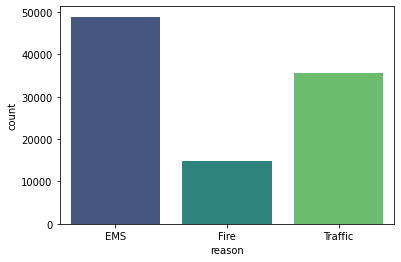

In [12]:
sns.countplot(x="reason", data=df, palette='viridis')

#### **Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp?**

Podemos fazer isso vendo o `dtype` (numpy) da Serie inteira, e confirmando visualizando o `type` (python built-in) de um registro da Serie, utilizando o `iloc[]` (Pandas).

In [13]:
df['timeStamp'].dtype

dtype('O')

In [14]:
type(df['timeStamp'].iloc[0])

str

#### **Você deveria ter notado que esses timestamps ainda são strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime.**

Sim tio, tu aí também deve ter notado que não faz sentido um timeStamp não ser... um timestamp XD.

Vamos corrigir essa bagaça entao.

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

#### **Agora você pode pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:**

    time = df['timeStamp'].iloc[0]
    time.hour

#### **Você pode usar o método de consulta de funções do Jupyter (Tab) para explorar os vários atributos que você pode chamar. Agora que a coluna timestamp é realmente objetos DateTime, use .apply () para criar 3 novas colunas chamadas Hour, Month e Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa.**

Ta tirando tio? Ficar preso, ta maluco. Aqui é favela bruxão. Ganhei 3 norte nordeste, 2 BBB, 4 reculuta, 1 copa do mundo. E tu acha que eu vou ficar preso nessa etapa?

BORAAA SAÍ DE CASA COMI PRA KRL.

Só não esquecer que weekday é um método e não um atributo como os outros.

In [16]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['weekday'] = df['timeStamp'].apply(lambda x: x.weekday())

In [17]:
df['weekday'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: weekday, dtype: int64

#### **Observe como o dia da semana é um número inteiro de 0-6. Use o .map () com este dicionário para mapear os nomes das sequencias reais para o dia da semana: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
    
Certo tio, tem o `map()` pra nos ajudar nessa.

In [18]:
dmap = {0:'Seg',1:'Ter',2:'Qua',3:'Qui',4:'Sex',5:'Sab',6:'Dom'}

In [19]:
df['weekday'] = df['weekday'].map(dmap)
df['weekday'].value_counts()

Ter    15150
Qua    14879
Sex    14833
Seg    14680
Qui    14478
Sab    13336
Dom    12136
Name: weekday, dtype: int64

#### **Agora use Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason. **

Beleza. A tradução saiu meio ruim, mas entendi que é pra user um atributo chamado `hue`, que agrupa uma coluna na outra (mais ou menos isso), negócio muito louco.

Se tu plotar direto com `sns.countplot(x='weekday', hue='reason', data=df, palette='viridis')`
vai perceber que a legenda ficou na Disney. 

Pega esse cheat aqui pra mandar ela pro lado:
`plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)`

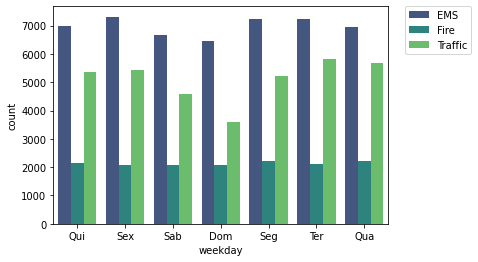

In [20]:
sns.countplot(x='weekday', hue='reason', data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### **Agora faça o mesmo para o mês:**

Safe

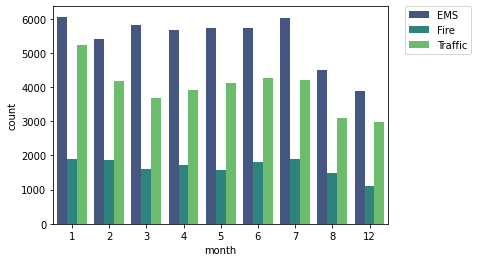

In [21]:
sns.countplot(x='month', hue='reason', data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### **Você notou algo estranho no Plot?**

Sim, cade o mes 9, 10 e 11 tio?
_____

#### **Você deve ter notado que estavam faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preencha os meses que faltam. Para fazer isso, precisamos trabalhar com pandas...**

#### **Agora, crie um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação. Use o método head() neste DataFrame retornado.**

iCaray! É bastante coisa, mas peguei o negócio.

In [22]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,weekday
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


#### **Agora crie um plot simples fora do Dataframe indicando a contagem de chamadas por mês.**

Por simples ele realmente quis dizer um `plot()`. Mas pra plotar precisamos escolher alguma coluna, simplesmente pra ser a contagem.
Vai a 'twp' mesmo.

Então vamo dale.


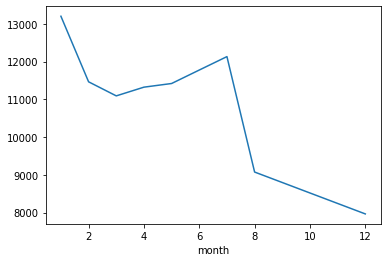

In [23]:
byMonth['twp'].plot()

#### **Agora veja se você pode usar o lmplot () do Seaborn para criar um modelo linear no número de chamadas por mês. Tenha em mente que talvez seja necessário resetar o índice em uma coluna.**

Beleza, valeu a dica. 
Como o nome 'month' existia no df, ao agruparmos por essa coluna, fez com que ela se tornasse o indice. Então o método `reset_index()` pode ser útil.
Mas também dava pra passar o byMonth.index como x.

Já eras, agora vamos admirar a beleza do modelo linear gerado, onde a área sombreada indica mais ou menos qual o erro do modelo. 
E da pra ver que aumenta pela falta de dados nos meses de outubro, novembro e dezembro né. Show

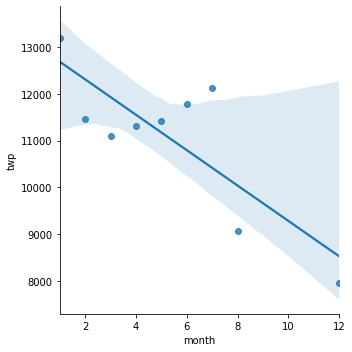

In [90]:

sns.lmplot(x='month', y='twp', data=byMonth.reset_index())

#### **Crie uma nova coluna chamada 'Data' que contenha a data da coluna timeStamp. Você precisará usar .apply() junto com o método .date().**

Aqui é o famoso método pra extrair a data de um timestamp.

Vom bora!

In [33]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())

#### **Agora agrupe esta coluna Data com o groupby. Usando o count (), crie um gráfico de contagens de chamadas 911.**

Beleza, como antes a gente só tinha um timestamp, não dava pra agrupar pelos dias. Mas agora que temos um _date_ conseguimos.

Vamos então agrupar esse negócio com o `.groupby()`, usar o `.count()` aplicado a qualquer coluna ('twp'), já que é só pra contabilizar a quantidade de chamdas. E como é pra plotar, vamos usar o tal do `.plot()` novamente.

Porém, se tu usar só plot aí, vai ver que a legenda (xlabel) vai ficar uma bosnia. Então, da pra usar o artifício do gca (_get current axes_) pra renomear cada data/mes, e definir o limite da esquerda em 2016 (era 2015 alguma coisa), e limite da direita até o mes 8 de 2016, pra ficar tudo beleza. 

Se tu não entendeu essa parte, recomendo que veja [esse projeto](https://github.com/gustavocrod/Data-Science/blob/master/Meteorology/Assignment2.ipynb) onde exploro o matplotlib com mais um exemplo prático.



(735964.0, 736201.0, 0.0, 1000.0)

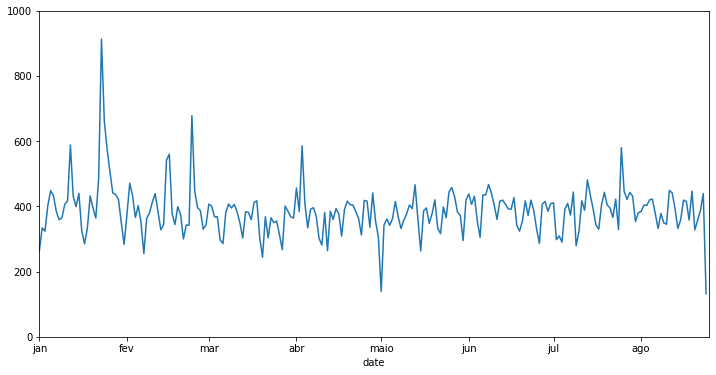

In [88]:
plt.figure(figsize=(12,6))
df.groupby('date').count()['twp'].plot()
ax = plt.gca() # pegando os eixos atuais (get current axes)
ax.set_xticklabels(('jan', 'fev', 'mar', 'abr', 'maio', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'),fontsize=10)
ax.axis(['2016/01/01','2016/08/25', 0, 1000])

#### **Agora recrie esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911**

Pra isso, a gente repete tudo que fez acima, só que aplica no que a gente quer. E a gente quer os tipos de razões, e é ele que nós vamos buscar.

_Sai fdp..._


Vou deixar todos em mesma escala, e vamos olhar os EMS, Fire e Traffic.

In [56]:
df['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

(735964.0, 736201.0, 0.0, 600.0)

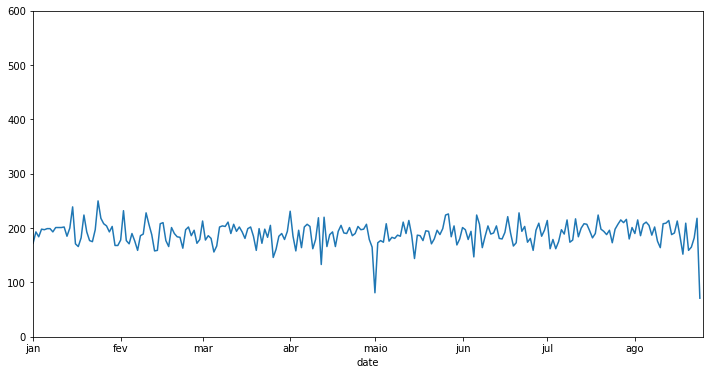

In [87]:
plt.figure(figsize=(12,6))
df[df['reason'] == 'EMS'].groupby('date').count()['twp'].plot()
ax = plt.gca() # pegando os eixos atuais (get current axes)
ax.set_xticklabels(('jan', 'fev', 'mar', 'abr', 'maio', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'),fontsize=10)
ax.axis(['2016/01/01','2016/08/25', 0, 600])

(735964.0, 736201.0, 0.0, 600.0)

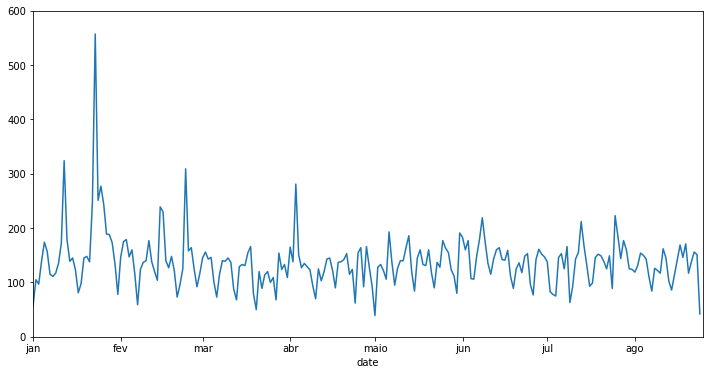

In [86]:
plt.figure(figsize=(12,6))
df[df['reason'] == 'Traffic'].groupby('date').count()['twp'].plot()
ax = plt.gca() # pegando os eixos atuais (get current axes)
ax.set_xticklabels(('jan', 'fev', 'mar', 'abr', 'maio', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'),fontsize=10)
ax.axis(['2016/01/01','2016/08/25', 0, 600])

(735964.0, 736201.0, 0.0, 600.0)

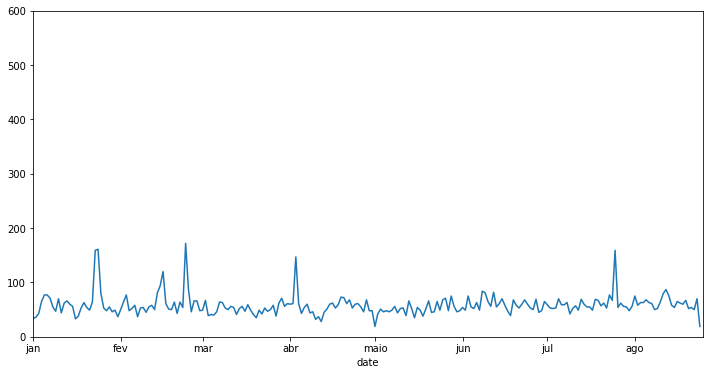

In [85]:
plt.figure(figsize=(12,6))
df[df['reason'] == 'Fire'].groupby('date').count()['twp'].plot()
ax = plt.gca() # pegando os eixos atuais (get current axes)
ax.set_xticklabels(('jan', 'fev', 'mar', 'abr', 'maio', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'),fontsize=10)
ax.axis(['2016/01/01','2016/08/25', 0, 600])

____
#### **Agora vamos continuar a criar mapas de calor com seaborn e nossos dados. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana. Há muitas maneiras de fazer isso, mas eu recomendaria tentar combinar groupby com o método [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) . Consulte as soluções se você ficar preso nisso!**

Viu que ele filma, e fala? Bixão mesmo. Definiu o problema e deu dicas.


Podemos dar o start nisso, usando um agrupamento multinível. Só loucura, loucura meu.

Depois o tal do `unstack`, desempilha algum 'tipo de matriz', quando essa tua matriz tem apenas 1 coluna mas contém um índice multinível. O lokinho meu.

Vamos lá.

In [77]:
dayhour_df = df.groupby(by=['weekday', 'hour']).count()
dayhour_df.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  reason  \
weekday hour                                                                  
Dom     0     383  383   383  336    383        383  383   381  383     383   
        1     306  306   306  280    306        306  304   303  306     306   
        2     286  286   286  246    286        286  285   285  286     286   
        3     268  268   268  228    268        268  268   266  268     268   
        4     242  242   242  199    242        242  242   241  242     242   

              month  data  date  
weekday hour                     
Dom     0       383   383   383  
        1       306   306   306  
        2       286   286   286  
        3       268   268   268  
        4       242   242   242

Pra exemplificar lá, vou mostrar o que acontece se tu pegar apenas 1 coluna de algo que já esta multinível

In [79]:
dayhour_df['twp']

weekday  hour
Dom      0       383
         1       304
         2       285
         3       268
         4       242
                ... 
Ter      19      731
         20      647
         21      570
         22      462
         23      274
Name: twp, Length: 168, dtype: int64

Daí a gente chama no desempilhar e... que dahora ne?

In [81]:
dayhour_df = dayhour_df['twp'].unstack()
dayhour_df

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Dom,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Qua,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334
Qui,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Sab,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Seg,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sex,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Ter,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274


#### **Agora crie um mapa de calor usando este DataFrame**

Mata de calor é o tal do `heatmap`. Muito binito por sinal.

Vamos usar o plt.figure pra plotar a criança maior, pra poder vislumbrar a petulância do cavalo.

E olhe a beleza de conseguir entender que a maioria das ligações ocorrem em horário de trabalho, das 7 as 20 horas.

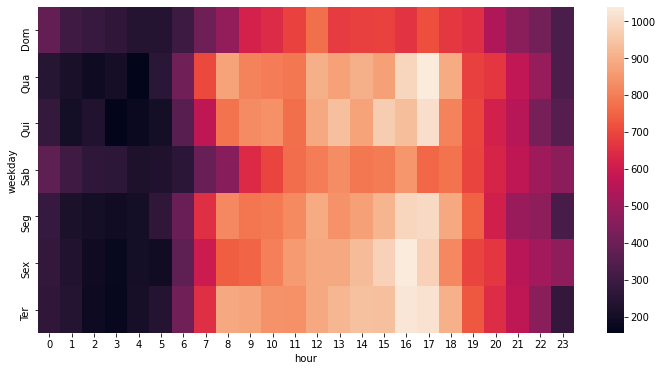

In [91]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour_df)

#### **Agora crie um clustermap usando este DataFrame.**

É òô táàl dú clustermap dààá ZL.

É só trocar de `heatmap` pra `clustermap`. Esse bicho agrupou os horários que tiveram mais ligações (parte mais clara do gráfico).

Muito elegante também.


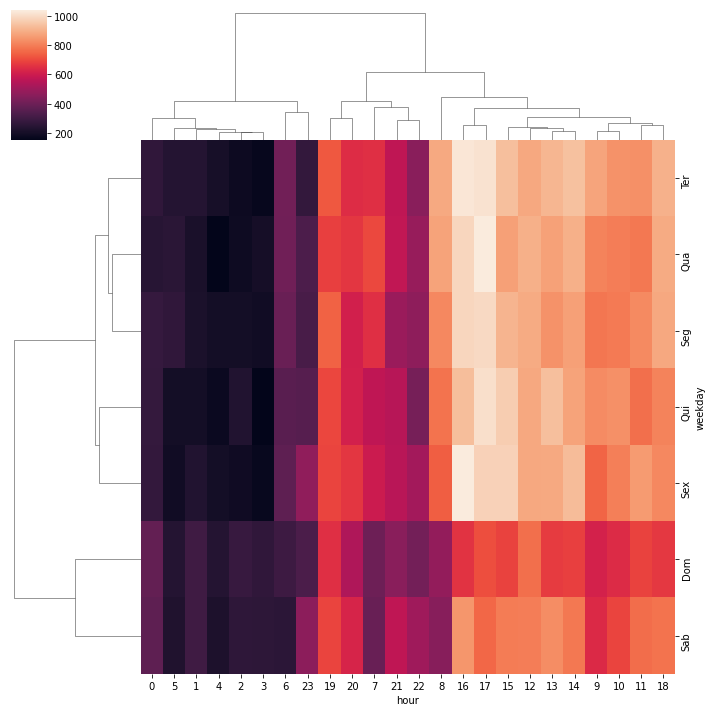

In [96]:
sns.clustermap(dayhour_df)

#### **Agora repita estes mesmos plots e operações para um DataFrame que mostra o mês como a coluna.**

Sim senhor patrão! Pra isso vamos modificar o multiindex, de horas para mês, e repetir o resto dos códigos. Dale

In [98]:
daymonth_df = df.groupby(by=['weekday', 'month']).count()['twp'].unstack()

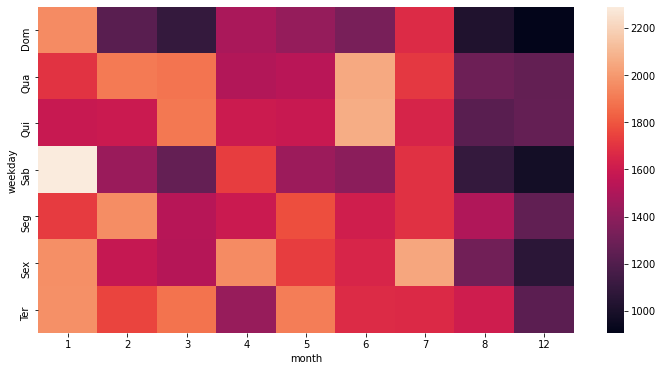

In [99]:
plt.figure(figsize=(12,6))
sns.heatmap(daymonth_df)

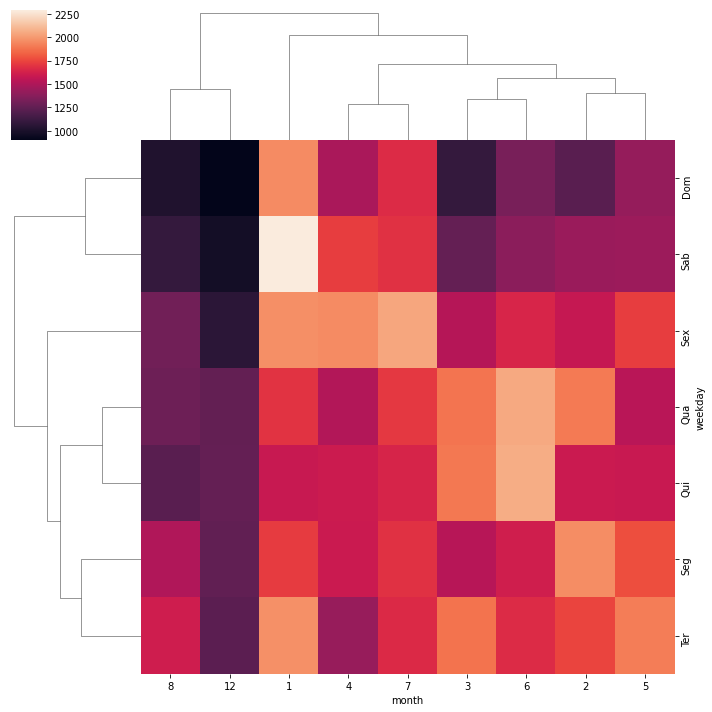

In [100]:
sns.clustermap(daymonth_df)

# Conclusão

Foi possível notar então, que entre 15, 16 e 17 horas a polícia foi mais acionada lá em Montgomery County, no ano de 2016. E esse valor diminui um pouco nos fins de semana.

Já vendo por dias no mês. Sábado do mês de janeiro daquele ano, a galera gritou bastante o "CHAMA A PULIÇA". Não consegui constatar o motivo. Se tu entender, me chama no zap 4002-8922.


Esse projeto guiado, foi extraído do curso que mencionei lá em cima, e provavelmente foi adaptado de um bootcamp com o nome de "Python Data Science and Machine Learning Bootcamp". Não tenho link, mas vi algo por aqui.

Enfim, esse projeto serve para testar os conhecimentos do PyData Stack, aplicando ele num cenário real de análise exploratória.

Vejo vocês por aí. Um bigBeijo!